In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
gold_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Gold Price/gld_price_data.csv")

In [5]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
#statistically measure
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive correlation
2. Negative correlation

Gold price and silver price is positively correlated

In [10]:
correlation = gold_data.corr()

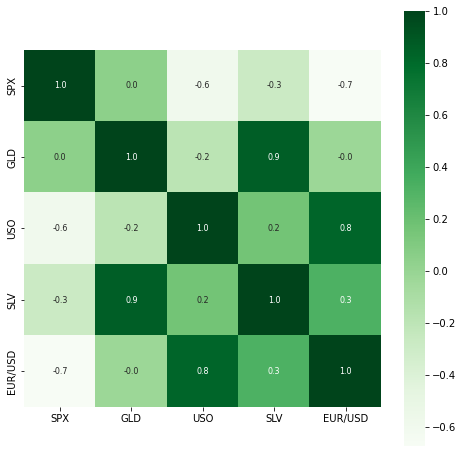

In [13]:
#figure to understand correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar = True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

In [14]:
#correlation values of GLd
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


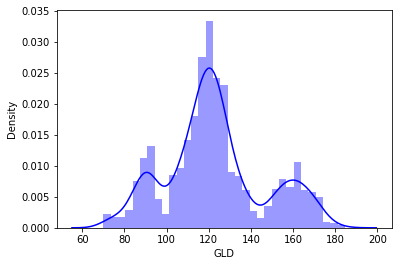

In [16]:
#checking the distribution of the gold price 
sns.distplot(gold_data['GLD'], color='Blue')

Splitting the features and target

In [17]:
x = gold_data.drop(['Date', 'GLD'], axis = 1)
y = gold_data['GLD']

In [18]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training and testing data

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [20]:
print(x_test)

              SPX        USO        SLV   EUR/USD
903   1351.949951  38.330002  32.900002  1.324854
129   1271.510010  93.900002  13.450000  1.472581
1787  1880.050049   8.910000  14.340000  1.119996
1913  2181.300049  10.960000  18.620001  1.127142
2048  2352.949951  10.680000  17.320000  1.067247
...           ...        ...        ...       ...
923   1370.869995  41.090000  33.220001  1.327492
1693  1952.290039  14.930000  13.990000  1.129089
2054  2349.010010  11.060000  17.430000  1.064453
658   1273.849976  37.680000  28.420000  1.315686
376   1057.579956  35.959999  17.250000  1.478131

[458 rows x 4 columns]


Model Training:
In random forest we use multiple decision trees

In [21]:
regressor = RandomForestRegressor(n_estimators=100)

In [22]:
#train the model
regressor.fit(x_train, y_train)

RandomForestRegressor()

Model Evaluation

In [23]:
#prediction on test data
test_data_prediction = regressor.predict(x_test)
print(test_data_prediction)

[168.51739947  81.8182999  115.48400001 127.52830106 120.35580174
 154.80369729 149.93609769 126.22750015 117.60649865 125.9353009
 116.88410082 171.51880125 140.61989844 167.61899823 115.18740045
 117.59920075 139.13690315 170.1783004  159.45850318 159.7341997
 155.04209985 125.58280032 175.16779942 157.2728032  125.19210042
  93.58109943  77.44759992 120.65500009 119.14229951 167.56710015
  88.21450084 125.29109983  91.06770073 117.73770014 121.1308991
 135.91300081 115.43670109 115.67380057 147.56380034 107.14870103
 104.45990255  87.24359829 126.50650068 117.84050005 152.43329818
 119.69930009 108.11889983 107.8669981   93.20830033 126.98249807
  74.59020014 113.58469909 121.48320002 111.38799909 118.83029881
 120.93979909 158.64519996 167.65180114 147.28829681  85.9503988
  94.20810024  86.7630989   90.37620026 118.96510057 126.49580058
 127.42650034 169.8784001  122.3529991  117.42999878  98.37449996
 168.25480107 142.65149819 132.43950227 121.1435022  121.3509997
 119.63330081 1

In [24]:
#R squared value
error_score = metrics.r2_score(y_test, test_data_prediction)
print (error_score)

0.9896852372584969


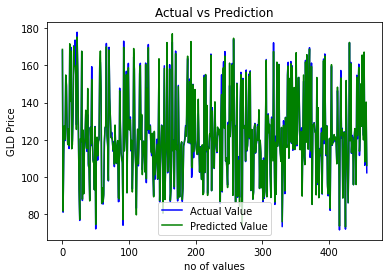

In [25]:
#graphical figures
y_test = list(y_test)
plt.plot(y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title("Actual vs Prediction")
plt.xlabel("no of values")
plt.ylabel('GLD Price')
plt.legend()
plt.show()